# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
sat = pd.read_csv('../data/sat.csv', index_col=0)
act = pd.read_csv('../data/act.csv', index_col=0)
# learned index can use... column indexing to be selected

http://knocking.wiche.edu/data

Found some sweet, sweet data here that reports high school grads before 2011 and projects beyond...  I don't know if I have time to munge it and combine it since the project is due in two days though!  I think I'll pull a couple numbers for the presentation.

##### 2. Print the first ten rows of each dataframe.

In [2]:
sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [3]:
act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

SAT: we have the State Column for where the data is from, the Participation column describes the 
percentage of high school students that took the SAT in 2017, the average Reading/Writing score for each state, 
the average Math score, and the average Total score.

ACT: very similar, though it is obvious they have a line for National scores that I may just want to remove, but since
it should be affected by state population it should not strickly be an average of all the states.  Participation again 
shows the percent of students who took the exam.  English, Math, Reading, and Science show average scores on each 
section.  Composite is a state wide average of composite scores (which are an average of the 4 other scores rounded up).

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [4]:
act.describe(include='all')
#act
#ACT has National numbers, but those can be dropped with a merge; otherwise the data seems to line up nicely

,State,Participation,English,Math,Reading,Science,Composite
count,52,52,52.000000,52.000000,52.000000,52.000000,52.000000
unique,52,28,NaN,NaN,NaN,NaN,NaN
top,Arizona,100%,NaN,NaN,NaN,NaN,NaN
freq,1,17,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,20.919231,21.173077,22.001923,21.442308,21.509615
std,NaN,NaN,2.332132,1.963602,2.048672,1.723351,2.002083
min,NaN,NaN,16.300000,18.000000,18.100000,18.200000,17.800000
25%,NaN,NaN,19.000000,19.400000,20.475000,19.975000,19.800000
50%,NaN,NaN,20.550000,20.900000,21.700000,21.300000,21.400000
75%,NaN,NaN,23.300000,23.100000,24.125000,23.200000,23.600000


In [5]:
sat.describe(include='all')
#sat

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,Arizona,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,556.882353,1126.098039
std,NaN,NaN,45.666901,47.121395,92.494812
min,NaN,NaN,482.000000,468.000000,950.000000
25%,NaN,NaN,533.500000,523.500000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


##### 5. Print the types of each column.

In [6]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [8]:
sat['Participation'] = sat['Participation'].apply(lambda x: int(x.strip('%'))/100)
act['Participation'] = act['Participation'].apply(lambda x: int(x.strip('%'))/100)
#convert participation columns to floats

In [9]:
sat['Participation'].head()
act['Participation'].head()
# In hindsight, I should not have divided them by 100 for the visualizations

0    0.60
1    1.00
2    0.65
3    0.62
4    1.00
Name: Participation, dtype: float64

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [10]:
#Not super clear what you want
sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [11]:
states = [x for x in sat['State']]
percents = [x for x in sat['Participation']]
satperc = {}
for x in range(len(states)):
    satperc[states[x]] = percents[x]
satperc
#this sounds like what you are requesting, but I am not sure why

{'Alabama': 0.050000000000000003,
 'Alaska': 0.38,
 'Arizona': 0.29999999999999999,
 'Arkansas': 0.029999999999999999,
 'California': 0.53000000000000003,
 'Colorado': 0.11,
 'Connecticut': 1.0,
 'Delaware': 1.0,
 'District of Columbia': 1.0,
 'Florida': 0.82999999999999996,
 'Georgia': 0.60999999999999999,
 'Hawaii': 0.55000000000000004,
 'Idaho': 0.93000000000000005,
 'Illinois': 0.089999999999999997,
 'Indiana': 0.63,
 'Iowa': 0.02,
 'Kansas': 0.040000000000000001,
 'Kentucky': 0.040000000000000001,
 'Louisiana': 0.040000000000000001,
 'Maine': 0.94999999999999996,
 'Maryland': 0.68999999999999995,
 'Massachusetts': 0.76000000000000001,
 'Michigan': 1.0,
 'Minnesota': 0.029999999999999999,
 'Mississippi': 0.02,
 'Missouri': 0.029999999999999999,
 'Montana': 0.10000000000000001,
 'Nebraska': 0.029999999999999999,
 'Nevada': 0.26000000000000001,
 'New Hampshire': 0.95999999999999996,
 'New Jersey': 0.69999999999999996,
 'New Mexico': 0.11,
 'New York': 0.67000000000000004,
 'North Car

In [12]:
#I think building a dictionary of States with dictionaries of the rest of the columns makes more sense
states = [x for x in sat['State']]
percents = [x for x in sat['Participation']]
readwrite = [x for x in sat['Evidence-Based Reading and Writing']]
math = [x for x in sat['Math']]
total = [x for x in sat['Total']]
satperc = {}
for x in range(len(states)):
    satperc[states[x]] = {'Participation': percents[x], 'Reading/Writing': readwrite[x], 'Math': math[x], 'Total': total[x]}
satperc
#There has to be a faster way to do it too...

{'Alabama': {'Math': 572,
  'Participation': 0.050000000000000003,
  'Reading/Writing': 593,
  'Total': 1165},
 'Alaska': {'Math': 533,
  'Participation': 0.38,
  'Reading/Writing': 547,
  'Total': 1080},
 'Arizona': {'Math': 553,
  'Participation': 0.29999999999999999,
  'Reading/Writing': 563,
  'Total': 1116},
 'Arkansas': {'Math': 594,
  'Participation': 0.029999999999999999,
  'Reading/Writing': 614,
  'Total': 1208},
 'California': {'Math': 524,
  'Participation': 0.53000000000000003,
  'Reading/Writing': 531,
  'Total': 1055},
 'Colorado': {'Math': 595,
  'Participation': 0.11,
  'Reading/Writing': 606,
  'Total': 1201},
 'Connecticut': {'Math': 512,
  'Participation': 1.0,
  'Reading/Writing': 530,
  'Total': 1041},
 'Delaware': {'Math': 492,
  'Participation': 1.0,
  'Reading/Writing': 503,
  'Total': 996},
 'District of Columbia': {'Math': 468,
  'Participation': 1.0,
  'Reading/Writing': 482,
  'Total': 950},
 'Florida': {'Math': 497,
  'Participation': 0.82999999999999996,


In [13]:
#satdict = {v: {'Participation': w, 'Read/Write': x, 'Math': y, 'Total': z} for v, w, x, y, z in sat.iterrows()}
#that doesn't iterate like I would have thought

In [14]:
test = [x for x in sat.iterrows()]
test[0][1]#[0]

State                                 Alabama
Participation                            0.05
Evidence-Based Reading and Writing        593
Math                                      572
Total                                    1165
Name: 0, dtype: object

In [15]:
satdict = {v: {'Participation': w, 'Read/Write': x, 'Math': y, 'Total': z} for v, w, x, y, z in [b for a, b in sat.iterrows()]}
satdict
#I like that better

{'Alabama': {'Math': 572,
  'Participation': 0.05,
  'Read/Write': 593,
  'Total': 1165},
 'Alaska': {'Math': 533,
  'Participation': 0.38,
  'Read/Write': 547,
  'Total': 1080},
 'Arizona': {'Math': 553,
  'Participation': 0.3,
  'Read/Write': 563,
  'Total': 1116},
 'Arkansas': {'Math': 594,
  'Participation': 0.03,
  'Read/Write': 614,
  'Total': 1208},
 'California': {'Math': 524,
  'Participation': 0.53,
  'Read/Write': 531,
  'Total': 1055},
 'Colorado': {'Math': 595,
  'Participation': 0.11,
  'Read/Write': 606,
  'Total': 1201},
 'Connecticut': {'Math': 512,
  'Participation': 1.0,
  'Read/Write': 530,
  'Total': 1041},
 'Delaware': {'Math': 492,
  'Participation': 1.0,
  'Read/Write': 503,
  'Total': 996},
 'District of Columbia': {'Math': 468,
  'Participation': 1.0,
  'Read/Write': 482,
  'Total': 950},
 'Florida': {'Math': 497,
  'Participation': 0.83,
  'Read/Write': 520,
  'Total': 1017},
 'Georgia': {'Math': 515,
  'Participation': 0.61,
  'Read/Write': 535,
  'Total': 1

In [16]:
satdict['Alaska']['Math']
# pretty intuitive

533

In [17]:
act.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [18]:
#%%timeit
actdict = {v: {'Participation': w, 'English': x, 'Math': y, 'Reading': z, 'Science': za, 'Composite': zb} for v, w, x, y, z, za, zb in [b for a, b in act.iterrows()]}
actdict

{'Alabama': {'Composite': 19.2,
  'English': 18.9,
  'Math': 18.4,
  'Participation': 1.0,
  'Reading': 19.7,
  'Science': 19.4},
 'Alaska': {'Composite': 19.8,
  'English': 18.7,
  'Math': 19.8,
  'Participation': 0.65,
  'Reading': 20.4,
  'Science': 19.9},
 'Arizona': {'Composite': 19.7,
  'English': 18.6,
  'Math': 19.8,
  'Participation': 0.62,
  'Reading': 20.1,
  'Science': 19.8},
 'Arkansas': {'Composite': 19.4,
  'English': 18.9,
  'Math': 19.0,
  'Participation': 1.0,
  'Reading': 19.7,
  'Science': 19.5},
 'California': {'Composite': 22.8,
  'English': 22.5,
  'Math': 22.7,
  'Participation': 0.31,
  'Reading': 23.1,
  'Science': 22.2},
 'Colorado': {'Composite': 20.8,
  'English': 20.1,
  'Math': 20.3,
  'Participation': 1.0,
  'Reading': 21.2,
  'Science': 20.9},
 'Connecticut': {'Composite': 25.2,
  'English': 25.5,
  'Math': 24.6,
  'Participation': 0.31,
  'Reading': 25.6,
  'Science': 24.6},
 'Delaware': {'Composite': 24.1,
  'English': 24.1,
  'Math': 23.4,
  'Partici

In [19]:
testdf = pd.DataFrame(actdict)
testdf.head()
# wait a minute

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Composite,19.2,19.80,19.70,19.4,22.80,20.8,25.20,24.10,24.20,19.80,...,21.8,19.8,20.70,20.3,23.60,23.80,21.90,20.40,20.5,20.2
English,18.9,18.70,18.60,18.9,22.50,20.1,25.50,24.10,24.40,19.00,...,20.7,19.5,19.50,19.5,23.30,23.50,20.90,20.00,19.7,19.4
Math,18.4,19.80,19.80,19.0,22.70,20.3,24.60,23.40,23.50,19.40,...,21.5,19.2,20.70,19.9,23.10,23.30,21.90,19.40,20.4,19.8
Participation,1.0,0.65,0.62,1.0,0.31,1.0,0.31,0.18,0.32,0.73,...,0.8,1.0,0.45,1.0,0.29,0.29,0.29,0.69,1.0,1.0
Reading,19.7,20.40,20.10,19.7,23.10,21.2,25.60,24.80,24.90,21.00,...,22.3,20.1,21.10,20.8,24.40,24.60,22.10,21.20,20.6,20.8


In [20]:
testdf.transpose()
#😑

,Composite,English,Math,Participation,Reading,Science
Alabama,19.2,18.9,18.4,1.00,19.7,19.4
Alaska,19.8,18.7,19.8,0.65,20.4,19.9
Arizona,19.7,18.6,19.8,0.62,20.1,19.8
Arkansas,19.4,18.9,19.0,1.00,19.7,19.5
California,22.8,22.5,22.7,0.31,23.1,22.2
Colorado,20.8,20.1,20.3,1.00,21.2,20.9
Connecticut,25.2,25.5,24.6,0.31,25.6,24.6
Delaware,24.1,24.1,23.4,0.18,24.8,23.6
District of Columbia,24.2,24.4,23.5,0.32,24.9,23.5
Florida,19.8,19.0,19.4,0.73,21.0,19.4


In [21]:
%%timeit
act2 = act.copy()
act2.index = act2['State']
act2dict = dict(act2.transpose().drop('State', 0))
act2dict
act2dict['Alaska']['English']
#this is a learning project...

100 loops, best of 3: 2.39 ms per loop


##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [22]:
for i in dict(sat)['State']:
    print(i)
# so dict(sat) does exactly that, correct?

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [23]:
iter(dict(act)['Composite'])
#yup, you can iterate over that
#though the .next() method didn't work when I tried that

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [24]:
#I switched questions 9 and 10 so I could rename the columns before the merge
act.columns = ['State', 'ACT Participation', 'ACT English', 'ACT Math', 'ACT Reading', 'ACT Science', 'ACT Composite']
sat.columns = ['State', 'SAT Participation', 'SAT Evidence-Based Reading and Writing', 'SAT Math', 'SAT Total']

##### 9. Merge the dataframes on the state column.

In [25]:
both = pd.merge(act, sat, on="State", how='inner')
#both
both.head()
#perfect; 51 records.  dropped the national row from ACT

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [26]:
both.dtypes
both.describe()

,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [27]:
# needed to work it out like this first to really learn what was going on
                  
def find_sd(list):
    # If you divide by len(list) - 1 instead of just len(list), you will gets the same std as pandas 
    # built in formulas. What I learned from "Data Science from Scratch" is that we do that with sample
    # populations because the calculated mean is only an estimate of the actual mean (what you would get if
    # you had all the data for the full population).
    # This SAT/ACT data is represented as based on the full population, so we should be able to use len(list) here.
    mean = sum(list)/len(list)
    sq_diff = sum([(x - mean)**2 for x in list])
    return (sq_diff/(len(list)))**(1/2)
    
#find_sd(both['ACT Participation'])
find_sd(both['ACT Math'])

1.9624620273436781

In [100]:
both['ACT Math'].mean()
np.std(both['ACT Math'])

1.9624620273436781

In [29]:
find_sd = lambda x: ((sum([(xi - (sum(x)/len(x)))**2 for xi in x]))/(len(x)))**(1/2)
find_sd(both['ACT Math'])
# damn, that was tricky.  technically it has a loop though so let's address that.

1.9624620273436781

In [30]:
%%timeit
find_sd = lambda x: ((sum([(xi - (sum(x)/len(x)))**2 for xi in x]))/(len(x)))**(1/2)
find_sd(both['ACT Math'])

1000 loops, best of 3: 1.01 ms per loop


In [31]:
find_sd = lambda x: ((sum((x - (x.mean()))**2))/(len(x)))**(1/2)
find_sd(both['ACT Math'])

1.9624620273436781

In [32]:
%%timeit
find_sd = lambda x: ((sum((x - (x.mean()))**2))/(len(x)))**(1/2)
find_sd(both['ACT Math'])
# Wow. I had to Google µs to know how much faster that is.
# Is this what you call optimizing your code?  Haha.

1000 loops, best of 3: 254 µs per loop


In [33]:
%%timeit
# for completeness                
def find_sd(list):
    mean = sum(list)/len(list)
    sq_diff = sum([(x - mean)**2 for x in list])
    return (sq_diff/(len(list)))**(1/2)
find_sd(both['ACT Math'])
#WHAT? Why is this faster?!

10000 loops, best of 3: 63.2 µs per loop


In [101]:
%%timeit                
def find_sd(data):
    n = len(data)
    mean = sum(data)/n
    sq_diff = sum([(x - mean)**2 for x in data])
    return (sq_diff/n)**(1/2)
find_sd(both['ACT Math'])
#very slight gain from only running len() once.
#OK, so maybe in the comprehension it has to calculate mean or len more than once?
#Also, just noticed that I'm using a list comprehension inside the function

10000 loops, best of 3: 58.8 µs per loop


In [35]:
%%timeit                
def find_sd(data):
    n = len(data)
    mean = sum(data)/n
    sq_diff = []
    for x in data:
        (x - mean)**2
    sq_diff = sum(sq_diff)
    return (sq_diff/n)**(1/2)
find_sd(both['ACT Math'])
# OK, I'm out.  Makes no sense anymore.

10000 loops, best of 3: 52.4 µs per loop


In [36]:
%%timeit                
def find_sd(data):
    n = len(data)
    mean = sum(data)/n
    sq_diff = [(x-mean)**2 for x in data]
    sq_diff = sum(sq_diff)
    return (sq_diff/n)**(1/2)
find_sd(both['ACT Math'])
# I lied, but NOW am definitely officially done.

10000 loops, best of 3: 57.2 µs per loop


In [37]:
sd = [find_sd(both[column]) for column in both.columns if column != 'State']
# couldn't get either type(both[column]) or both[column].dtype to filter correctly
sd

[0.31824175751231809,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.0007860815819889,
 0.34929070766645071,
 45.216970204378661,
 46.65713364485503,
 91.583510567787428]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [38]:
df2 = pd.DataFrame([["Standard Deviation"] + sd])
df2.columns = both.columns
df3 = pd.concat([both, df2])
df3.reset_index(inplace=True)
df3.drop('index', axis=1)
#I think this is what you are requesting. It makes a new row with the 'State' as "Standard Deviation" with the sd's

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
0,Alabama,1.000000,18.900000,18.400000,19.700000,19.400000,19.200000,0.050000,593.00000,572.000000,1165.000000
1,Alaska,0.650000,18.700000,19.800000,20.400000,19.900000,19.800000,0.380000,547.00000,533.000000,1080.000000
2,Arizona,0.620000,18.600000,19.800000,20.100000,19.800000,19.700000,0.300000,563.00000,553.000000,1116.000000
3,Arkansas,1.000000,18.900000,19.000000,19.700000,19.500000,19.400000,0.030000,614.00000,594.000000,1208.000000
4,California,0.310000,22.500000,22.700000,23.100000,22.200000,22.800000,0.530000,531.00000,524.000000,1055.000000
5,Colorado,1.000000,20.100000,20.300000,21.200000,20.900000,20.800000,0.110000,606.00000,595.000000,1201.000000
6,Connecticut,0.310000,25.500000,24.600000,25.600000,24.600000,25.200000,1.000000,530.00000,512.000000,1041.000000
7,Delaware,0.180000,24.100000,23.400000,24.800000,23.600000,24.100000,1.000000,503.00000,492.000000,996.000000
8,District of Columbia,0.320000,24.400000,23.500000,24.900000,23.500000,24.200000,1.000000,482.00000,468.000000,950.000000
9,Florida,0.730000,19.000000,19.400000,21.000000,19.400000,19.800000,0.830000,520.00000,497.000000,1017.000000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [39]:
both.sort_values('SAT Participation', ascending=False)

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [40]:
both[both['SAT Participation'] > .5].sort_values('SAT Participation', ascending=False)#.count()
#22 states with 50% or more participation rates in SAT

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,1062


In [41]:
both[both['ACT Participation'] < .5].sort_values('SAT Participation', ascending=True)#.count()
# looking at relationships

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
37,Oregon,0.40,21.2,21.5,22.4,21.7,21.8,0.43,560,548,1108
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
45,Vermont,0.29,23.3,23.1,24.4,23.2,23.6,0.60,562,551,1114
43,Texas,0.45,19.5,20.7,21.1,20.9,20.7,0.62,513,507,1020
14,Indiana,0.35,22.0,22.4,23.2,22.3,22.6,0.63,542,532,1074
47,Washington,0.29,20.9,21.9,22.1,22.0,21.9,0.64,541,534,1075
46,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.65,561,541,1102
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071
32,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052
20,Maryland,0.28,23.3,23.1,24.2,23.2,23.6,0.69,536,524,1060


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#plt.rcParams['patch.force_edgecolor'] = True

plt.rcParams['figure.figsize'] = [16, 8]
# Chris showed me how to make my graphs bigger.  I can't get the font size to work right.
sns.set(font_scale=1.5)
#Ha, fixed

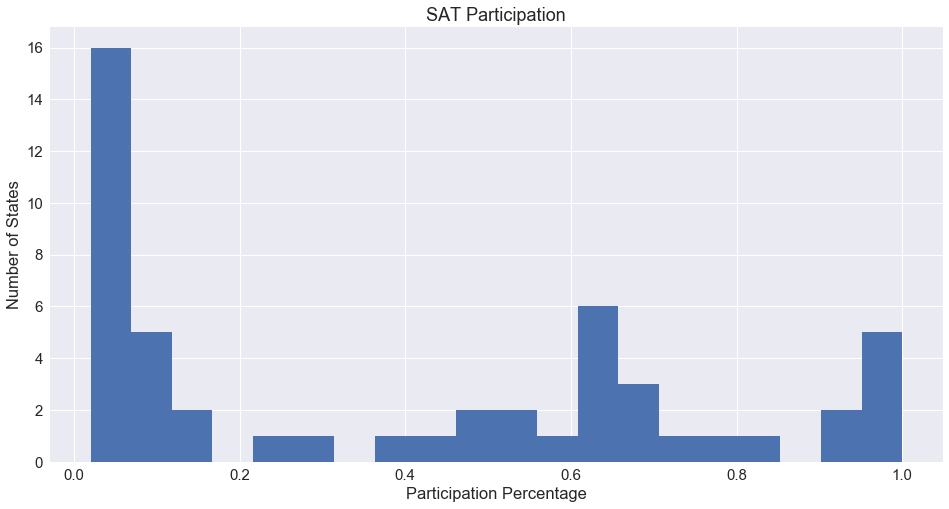

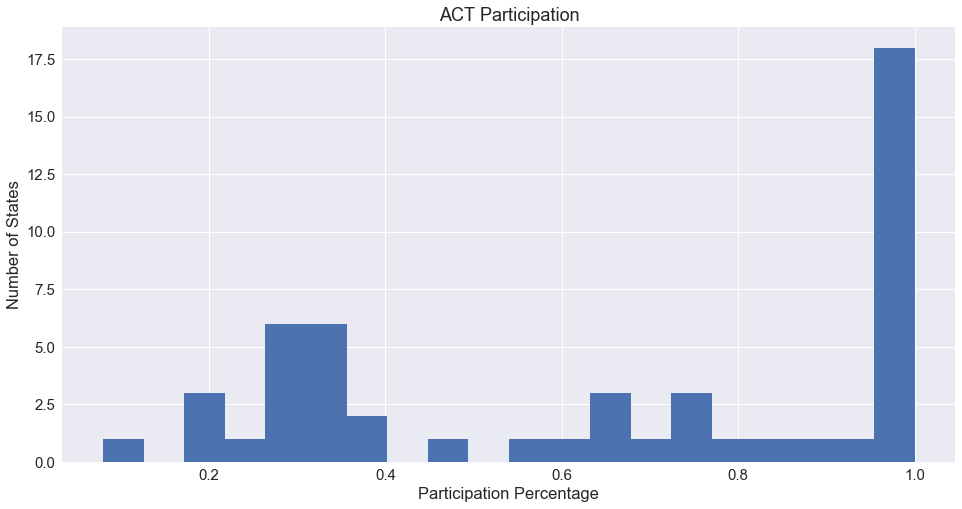

In [43]:
#bins=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
#not sure how I feel about the bins, they change the look so much, tried 10, 20, 51

plt.figure(1)
plt.hist(both['SAT Participation'], bins=20,)
plt.title('SAT Participation')
plt.xlabel('Participation Percentage')
plt.ylabel('Number of States')

plt.figure(2)
plt.hist(both['ACT Participation'], bins=20)
plt.title('ACT Participation')
plt.xlabel('Participation Percentage')
plt.ylabel('Number of States')

plt.show()

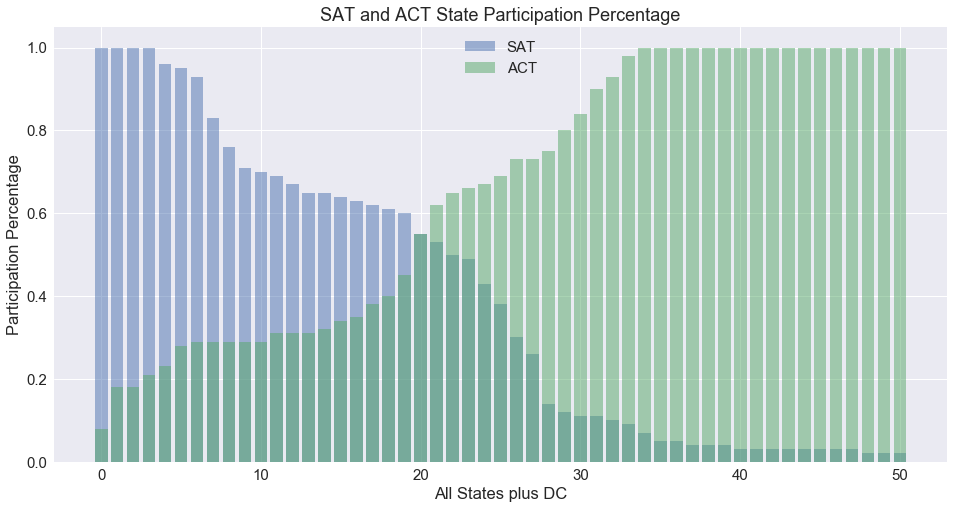

In [104]:
x = [i for i in range(51)] #Data Science from Scratch helped me come up with this line, I was feeding the states as x at first and the labels looked horrid.
y = both['SAT Participation'].sort_values(ascending=False)
plt.bar(x, y, alpha=0.5)
y2 = both['ACT Participation'].sort_values()
plt.bar(x, y2, alpha=0.5)
plt.title('SAT and ACT State Participation Percentage')
plt.xlabel('All States plus DC')
plt.ylabel('Participation Percentage')
plt.legend(['SAT', 'ACT'])
plt.show()
# Damn.  That's a sweet ass graph!

##### 17. Plot the Math(s) distributions from both data sets.

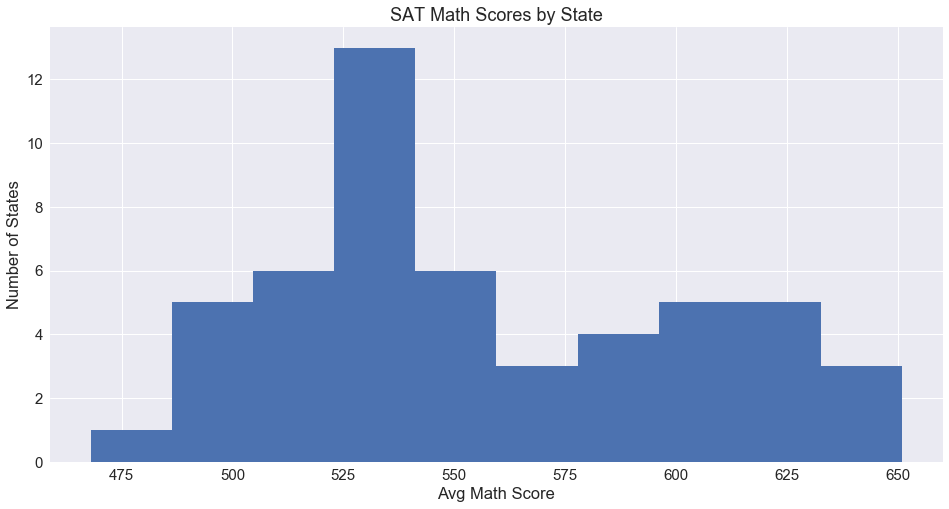

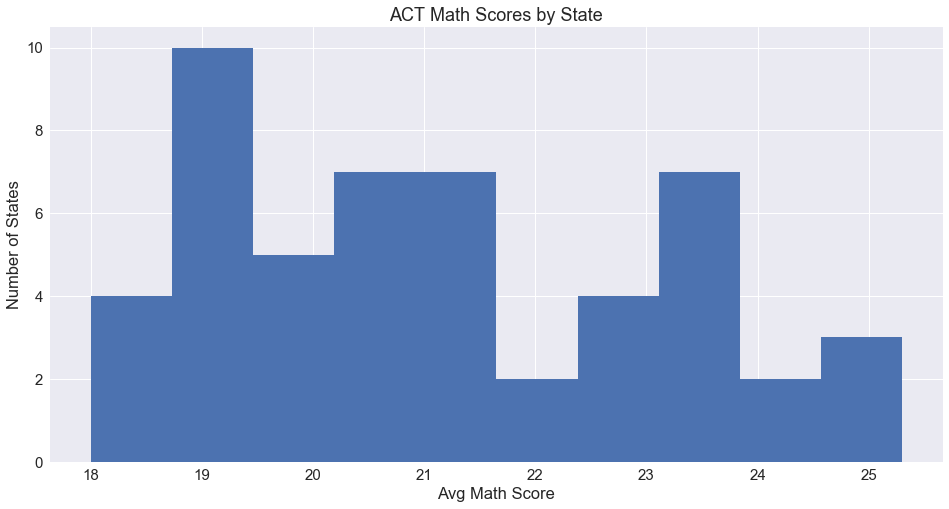

In [45]:
plt.figure(1)
plt.hist(both['SAT Math'], bins=10)
plt.title('SAT Math Scores by State')
plt.xlabel('Avg Math Score')
plt.ylabel('Number of States')

plt.figure(2)
plt.hist(both['ACT Math'], bins=10)
plt.title('ACT Math Scores by State')
plt.xlabel('Avg Math Score')
plt.ylabel('Number of States')

plt.show()

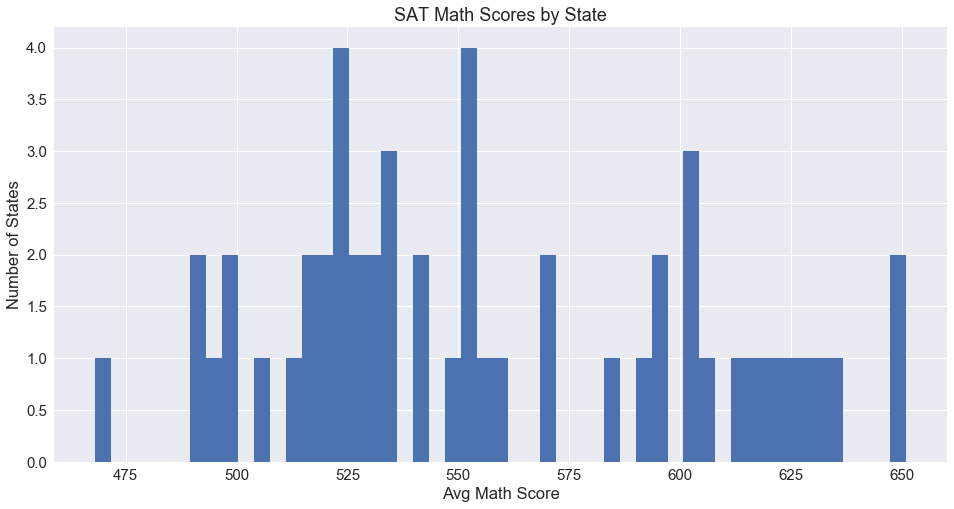

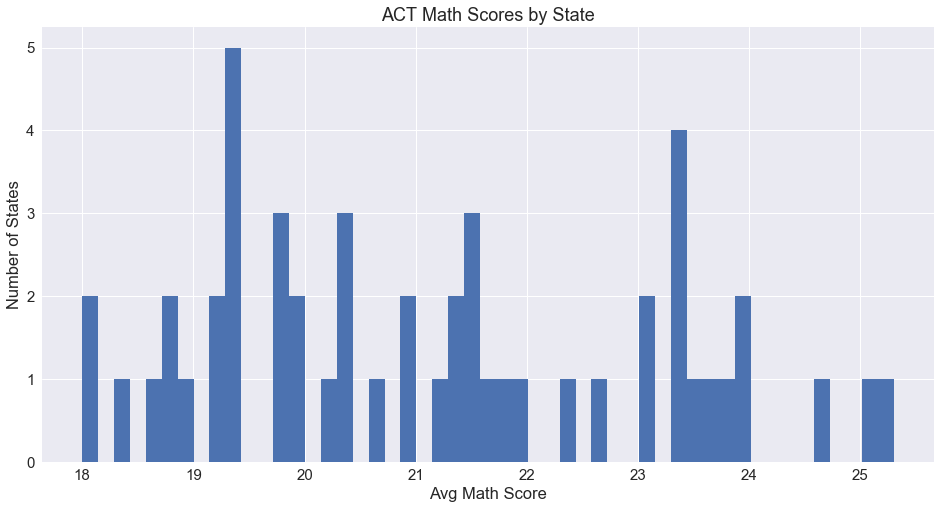

In [46]:
plt.figure(1)
plt.hist(both['SAT Math'], bins=51)
plt.title('SAT Math Scores by State')
plt.xlabel('Avg Math Score')
plt.ylabel('Number of States')

plt.figure(2)
plt.hist(both['ACT Math'],bins=51)
plt.title('ACT Math Scores by State')
plt.xlabel('Avg Math Score')
plt.ylabel('Number of States')

plt.show()

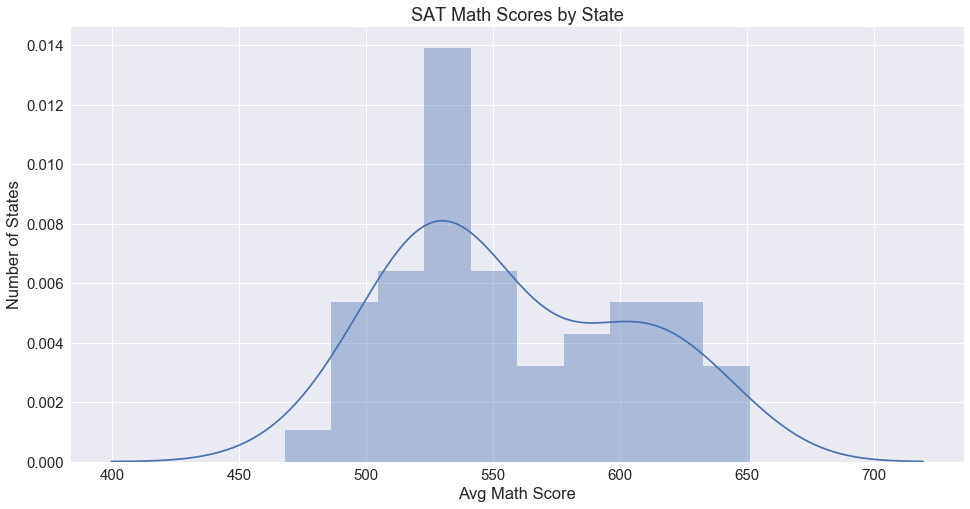

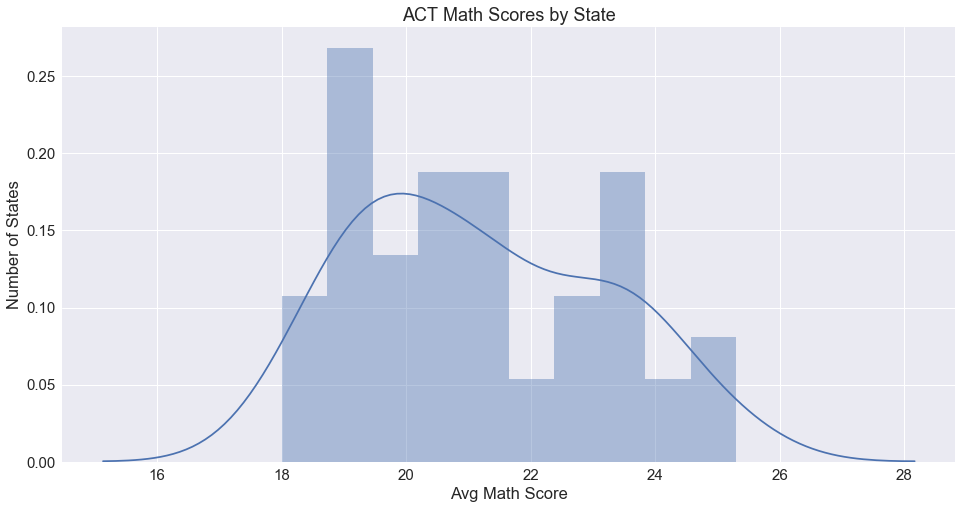

In [47]:
#Matt showed the sns.distplot in lecture and I wanted to utilize that sweet kde action
plt.figure(1)
sns.distplot(both['SAT Math'], bins=10, kde=True,)
plt.title('SAT Math Scores by State')
plt.xlabel('Avg Math Score')
plt.ylabel('Number of States')

plt.figure(2)
sns.distplot(both['ACT Math'], bins=10, kde=True)
plt.title('ACT Math Scores by State')
plt.xlabel('Avg Math Score')
plt.ylabel('Number of States')

plt.show()

## Here I want to try out the ecdf's

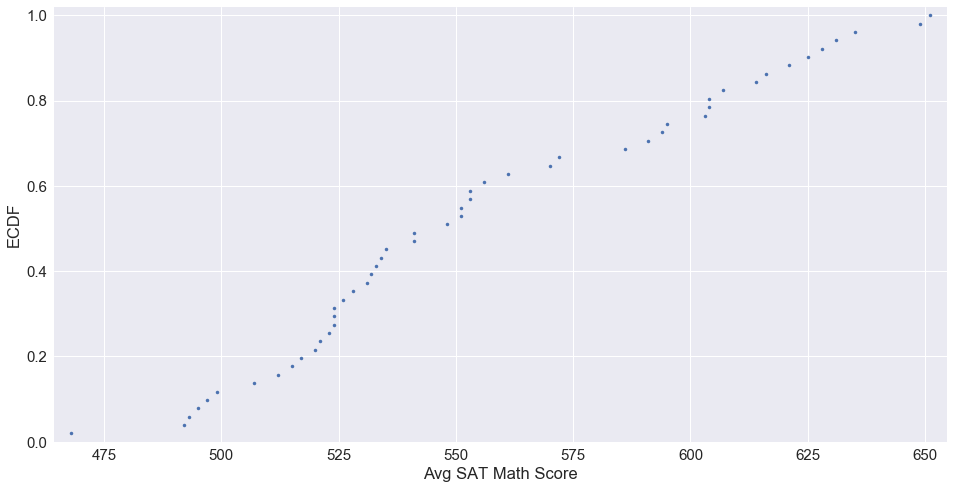

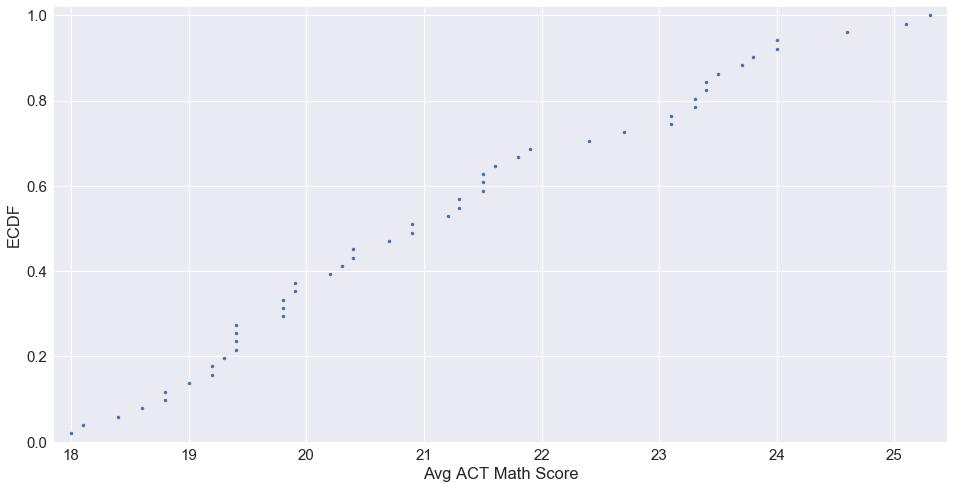

In [48]:
import numpy as np
# the empirical cumulative distribution was something we did in the
# pre-work for Data Camp
plt.figure(1)
n1 = len(both['SAT Math'])
x1 = np.sort(both['SAT Math'])
y1 = np.arange(1, n1+1) / n1
plt.plot(x1, y1, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Avg SAT Math Score')
plt.ylabel('ECDF')

plt.figure(2)
n2 = len(both['ACT Math']) #uh, that should be the same
x2 = np.sort(both['ACT Math'])
y2 = np.arange(1, n2+1) / n2
plt.plot(x2, y2, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Avg ACT Math Score')
plt.ylabel('ECDF')

plt.show()
# well, this might be more interesting on the participation
# kinda hard to compare scores when they are on different scales

I want to plot the ECDF of participation

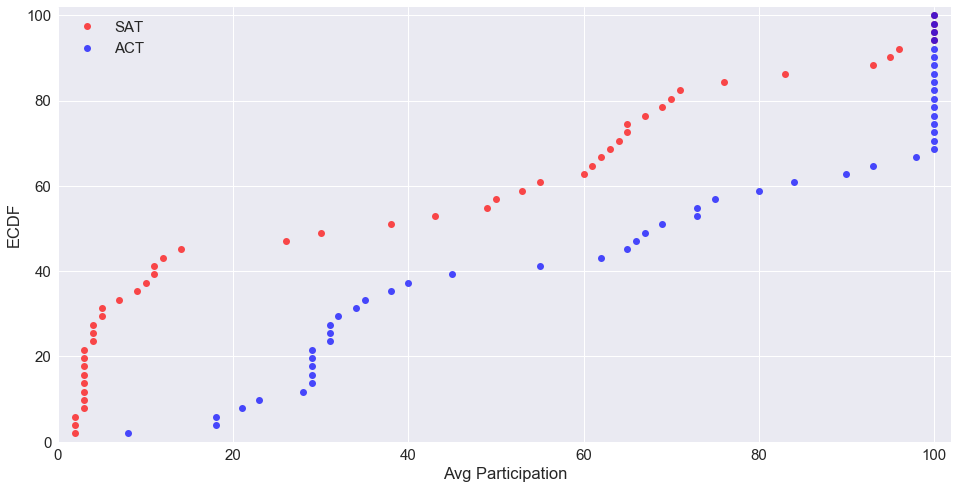

In [49]:

n1 = len(both['SAT Participation'])
x1 = np.sort(both['SAT Participation']*100)
y1 = (np.arange(1, n1+1) / n1) * 100
plt.plot(x1, y1, marker='o', color='r', linestyle='none', alpha=0.7)
plt.margins(0.02)
plt.xlabel('Avg Participation')
plt.ylabel('ECDF')

n2 = len(both['ACT Participation'])
x2 = np.sort(both['ACT Participation']*100)
y2 = (np.arange(1, n2+1) / n2) *100
plt.plot(x2, y2, marker='o', color='b', linestyle='none', alpha=0.7)
plt.margins(0.02)
#plt.xlabel('Avg Participation')
#plt.ylabel('ECDF')
plt.legend(['SAT', 'ACT'])
plt.show()
# Oh damn, SAT got rocked.  Over half the States had a participation of less than 40%
# Might need to fiddle with the top of the graph as the green covers the blue there
# Not a fan of the alpha
# Works a bit better with red and blue
# Ultimately this is showing the same thing as the cooler looking graph I came up with earlier. 
# I noticed more from it, but I think the first one would be better given the audience.

##### 18. Plot the Verbal distributions from both data sets.

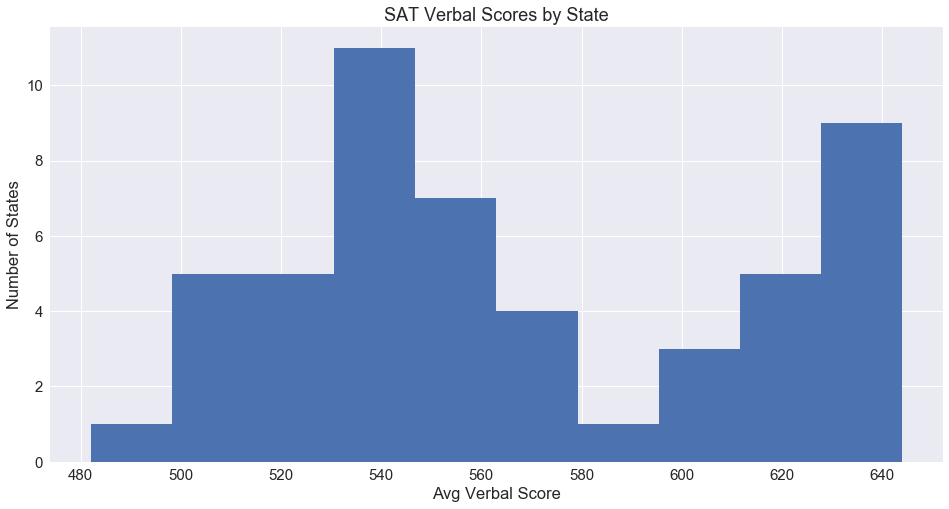

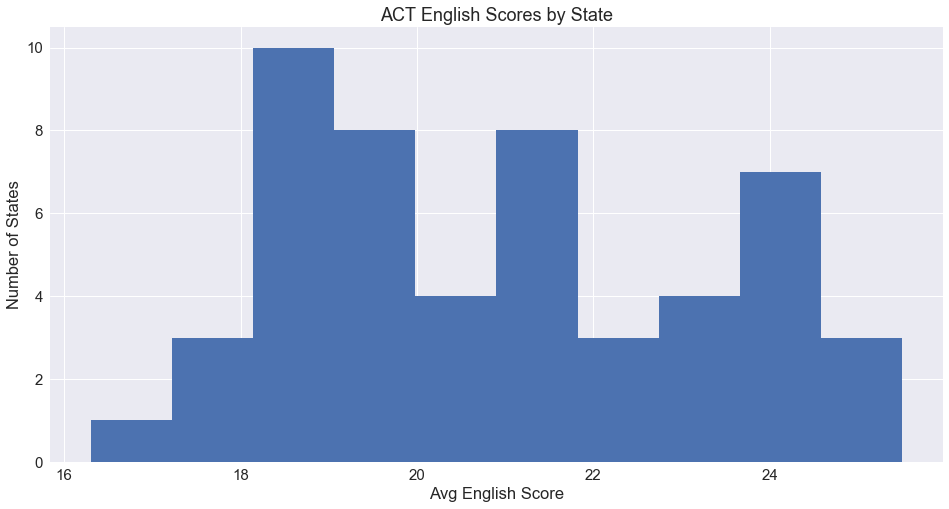

In [50]:
plt.figure(1)
plt.hist(both['SAT Evidence-Based Reading and Writing'])
plt.title('SAT Verbal Scores by State')
plt.xlabel('Avg Verbal Score')
plt.ylabel('Number of States')

plt.figure(2)
plt.hist(both['ACT English'])
plt.title('ACT English Scores by State')
plt.xlabel('Avg English Score')
plt.ylabel('Number of States')

plt.show()

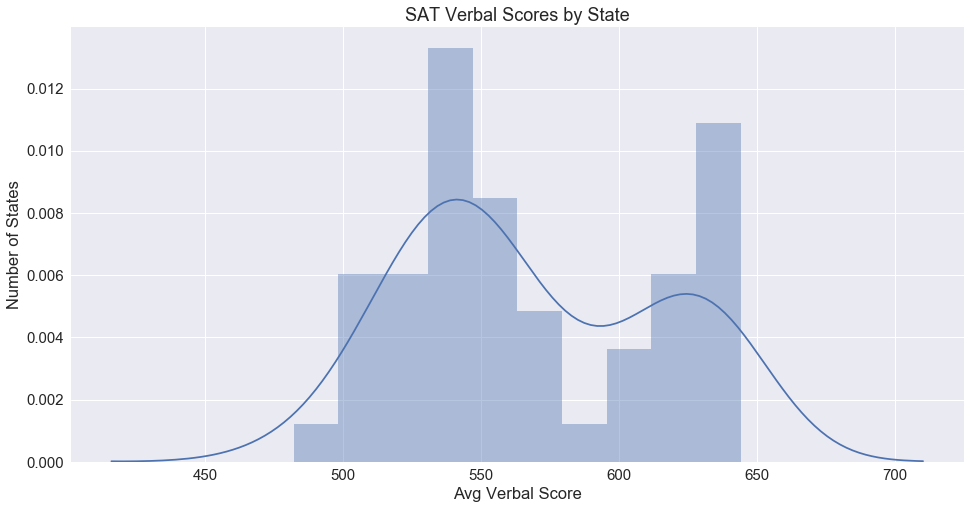

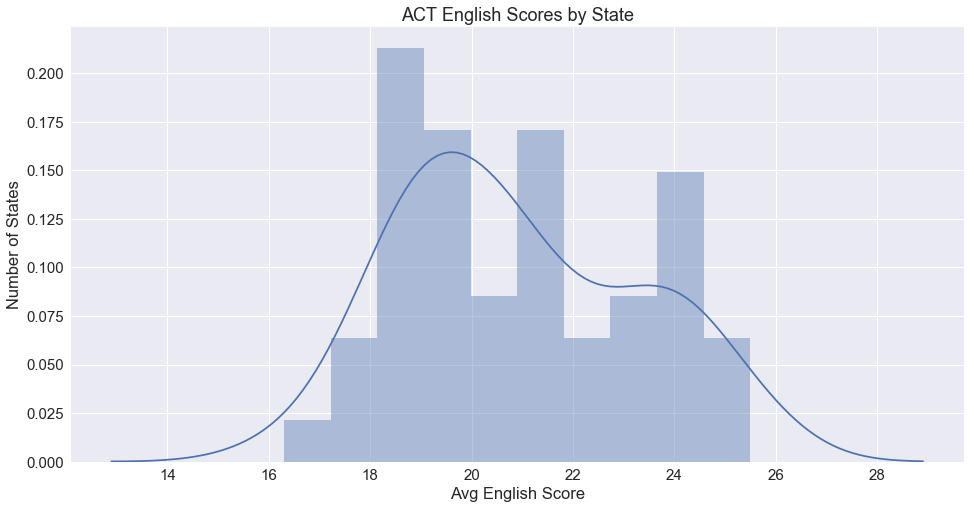

In [51]:
#Matt showed the sns.distplot in lecture and I wanted to utilize that sweet kde action
plt.figure(1)
sns.distplot(both['SAT Evidence-Based Reading and Writing'], bins=10, kde=True)
plt.title('SAT Verbal Scores by State')
plt.xlabel('Avg Verbal Score')
plt.ylabel('Number of States')

plt.figure(2)
sns.distplot(both['ACT English'], bins=10, kde=True)
plt.title('ACT English Scores by State')
plt.xlabel('Avg English Score')
plt.ylabel('Number of States')

plt.show()
#I know why it changes the y-axis scale, but I wish it wouldn't.  Have not been able to figure that out yet.

## Plotting the total scores of SAT and ACT

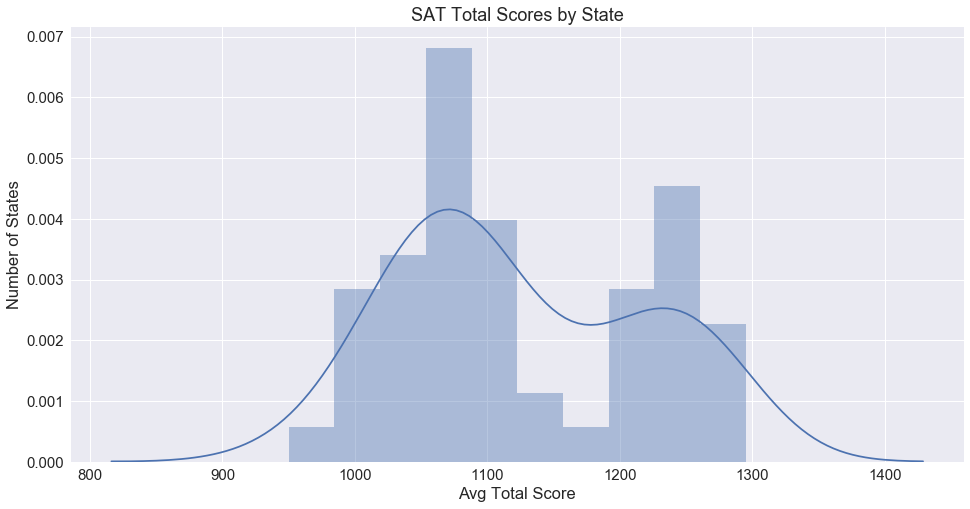

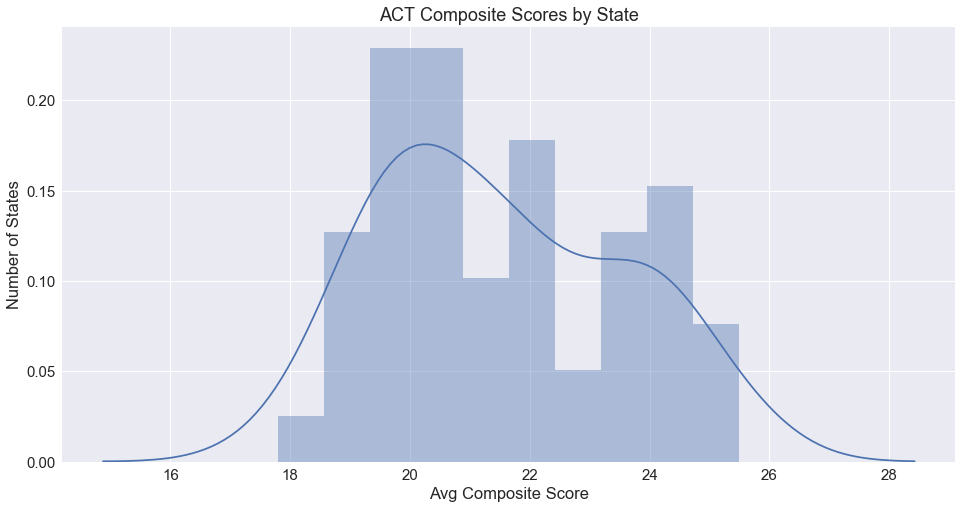

In [52]:
sns.distplot(both['SAT Total'], bins=10, kde=True)
plt.title('SAT Total Scores by State')
plt.xlabel('Avg Total Score')
plt.ylabel('Number of States')

plt.figure(2)
sns.distplot(both['ACT Composite'], bins=10, kde=True)
plt.title('ACT Composite Scores by State')
plt.xlabel('Avg Composite Score')
plt.ylabel('Number of States')

plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [53]:
# That they have a normal distribution?

##### 20. Does this assumption hold true for any of our columns? Which?

In [54]:
# None of the columns have normal distributions.  
# I'm guessing something happens to the scores as participation goes up that may cause this as I would imagine test scores would otherwise have normal distributions

##### 21. Plot some scatterplots examining relationships between all variables.

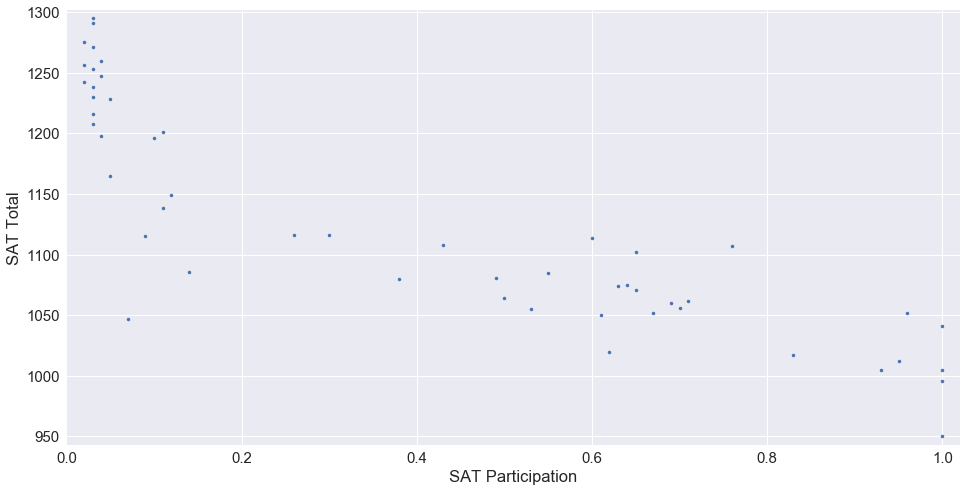

In [55]:
plt.plot(both['SAT Participation'], both['SAT Total'], marker='.', linestyle='none', alpha=1)
plt.margins(0.02)
plt.xlabel('SAT Participation')
plt.ylabel('SAT Total')
plt.show()
# YUP.  Only the smart kids are taking it in the low participation states

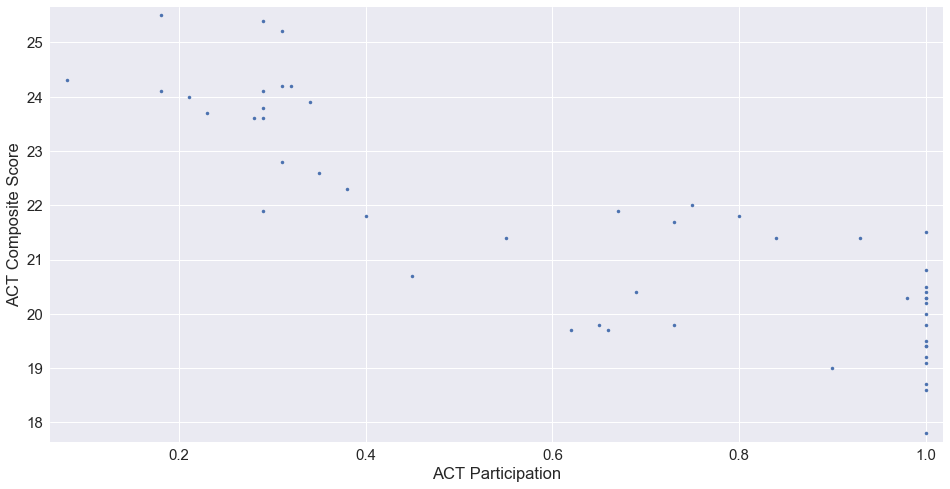

In [56]:
plt.plot(both['ACT Participation'], both['ACT Composite'], marker='.', linestyle='none', alpha=1)
plt.margins(0.02)
plt.xlabel('ACT Participation')
plt.ylabel('ACT Composite Score')
plt.show()
# Same, same.  Interestingly enough, the ACT does not immediately appear to have as big a drop off in scores from
# the mid-range participation to full particpation compared to the SAT scores which seemed more significantly

In [57]:
both.head()

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


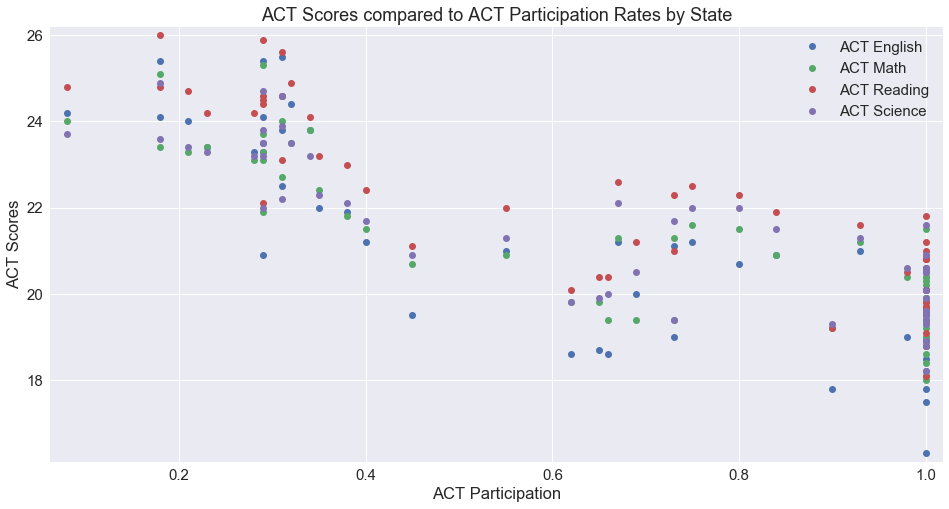

In [58]:
plt.plot(both['ACT Participation'], both['ACT English'], marker='o', linestyle='none', alpha=1)
plt.plot(both['ACT Participation'], both['ACT Math'], marker='o', linestyle='none', alpha=1)
plt.plot(both['ACT Participation'], both['ACT Reading'], marker='o', linestyle='none', alpha=1)
plt.plot(both['ACT Participation'], both['ACT Science'], marker='o', linestyle='none', alpha=1)
plt.margins(0.02)
plt.legend()
plt.title('ACT Scores compared to ACT Participation Rates by State')
plt.xlabel('ACT Participation')
plt.ylabel('ACT Scores')
plt.show()
# Seems pretty clear that people tend to score highest on Reading, then Science, Math, and finally English

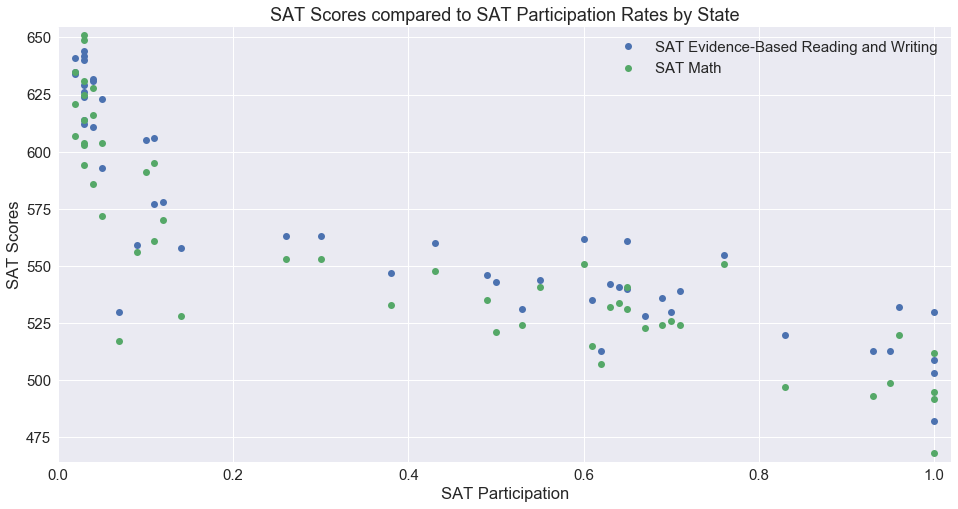

In [59]:
plt.plot(both['SAT Participation'], both['SAT Evidence-Based Reading and Writing'], marker='o', linestyle='none', alpha=1)
plt.plot(both['SAT Participation'], both['SAT Math'], marker='o', linestyle='none', alpha=1)
plt.margins(0.02)
plt.legend()
plt.title('SAT Scores compared to SAT Participation Rates by State')
plt.xlabel('SAT Participation')
plt.ylabel('SAT Scores')
plt.show()

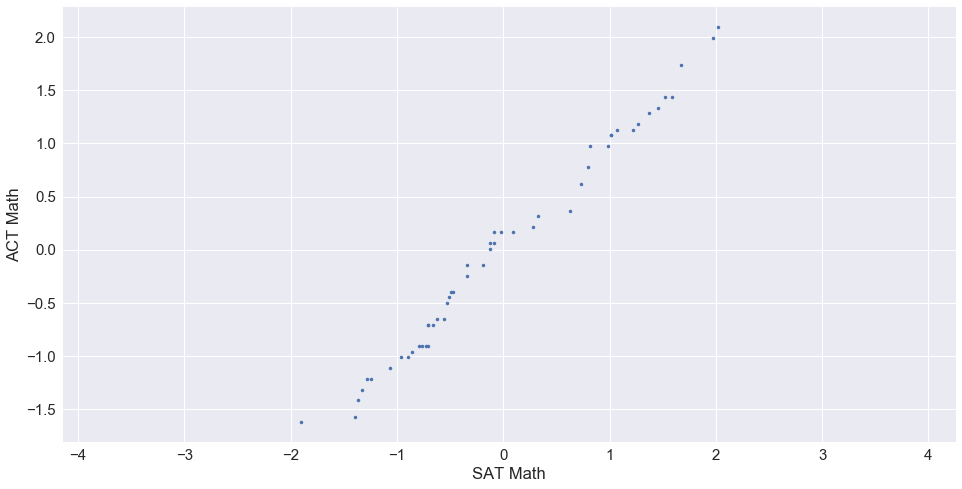

In [60]:
xmean = np.mean(both['SAT Math'])
xstd = np.std(both['SAT Math'])
x1 = (both['SAT Math'] - xmean)/xstd
ymean = np.mean(both['ACT Math'])
ystd = np.std(both['ACT Math'])
y1 = (both['ACT Math'] - ymean)/ystd
plt.plot(sorted(x1), sorted(y1), marker='.', linestyle='none')
plt.axis('equal')
plt.xlabel('SAT Math')
plt.ylabel('ACT Math')
plt.show()
# Alright, so I wanted to compare scores between the two tests and see if the distributions of math scores for the ACT and SAT were similar. 
# Without sorting the data, they look like shotgun blasts, but I am not sure I get much info from the sorted scores.
# They lose their states when I do that and are not one for one.

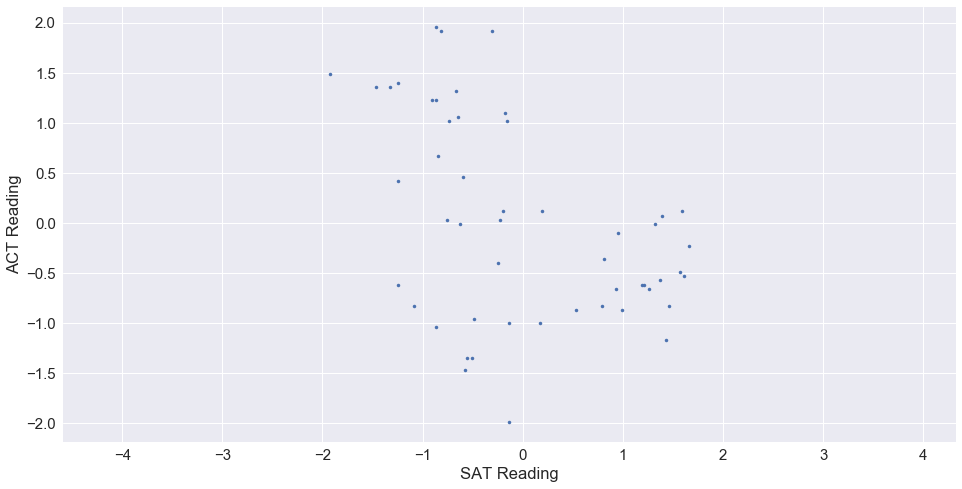

In [61]:
xmean = np.mean(both['SAT Evidence-Based Reading and Writing'])
xstd = np.std(both['SAT Evidence-Based Reading and Writing'])
x1 = (both['SAT Evidence-Based Reading and Writing'] - xmean)/xstd
ymean = np.mean(both['ACT English'])
ystd = np.std(both['ACT English'])
y1 = (both['ACT English'] - ymean)/ystd
plt.plot((x1), (y1), marker='.', linestyle='none')
plt.axis('equal')
plt.xlabel('SAT Reading')
plt.ylabel('ACT Reading')
plt.show()
# Wanted to test on the English just to see if it was meaningful here and to show a comparison with the above graph
# By state there is no coorilation, but their distributions are comparable 

##### 22. Are there any interesting relationships to note?

The main relationship that I noticed was that as participation increases, the average scores decrease.  This is true for both SAT and ACT.  However, the drop in ACT scores is not as steep as SAT scores.

##### 23. Create box plots for each variable. 

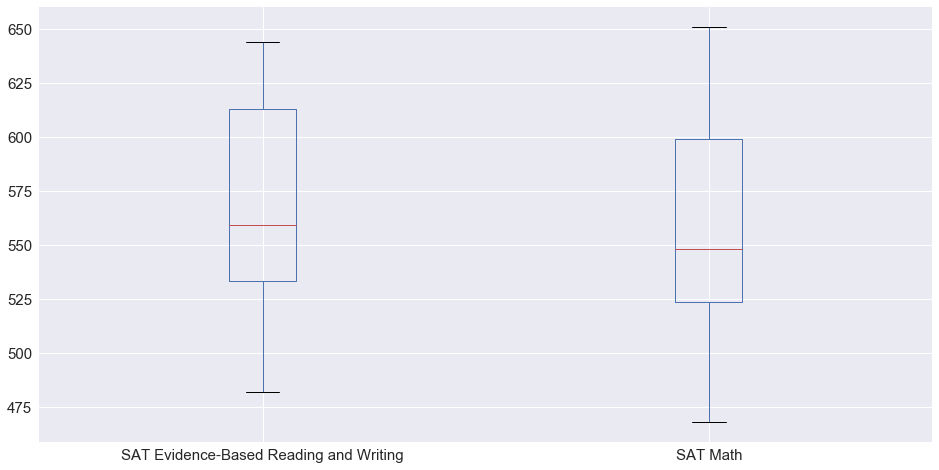

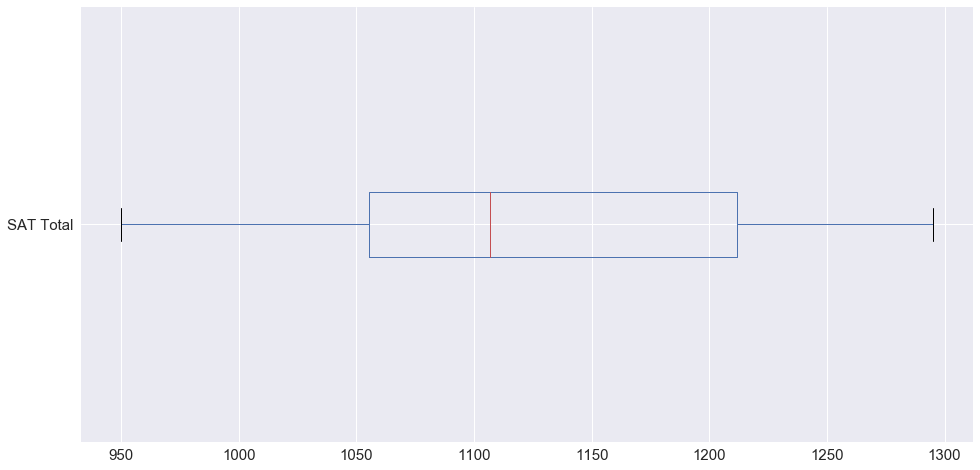

In [63]:
plt.figure(1)
both.boxplot(column=['SAT Evidence-Based Reading and Writing', 'SAT Math'])
plt.figure(2)
both.boxplot(column=['SAT Total'], vert=False)
plt.show()

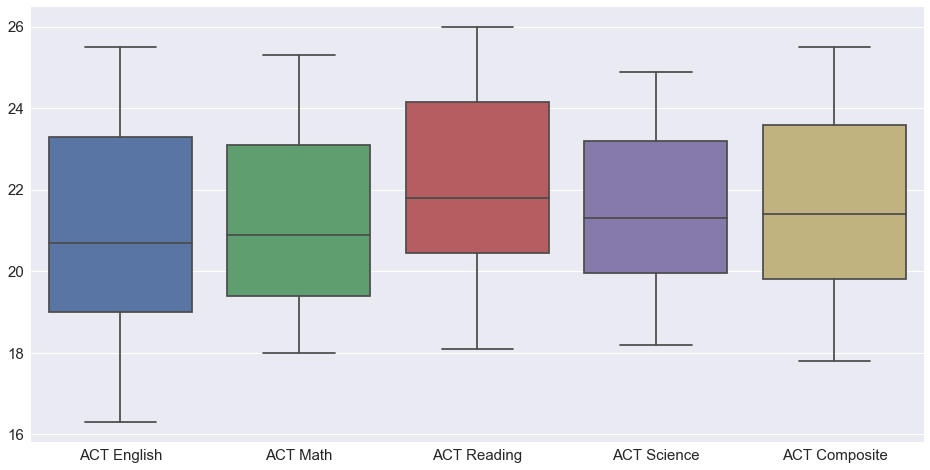

In [66]:
sns.boxplot(data=both.loc[:, ['ACT English', 'ACT Math', 'ACT Reading', 'ACT Science', 'ACT Composite']])

plt.show()

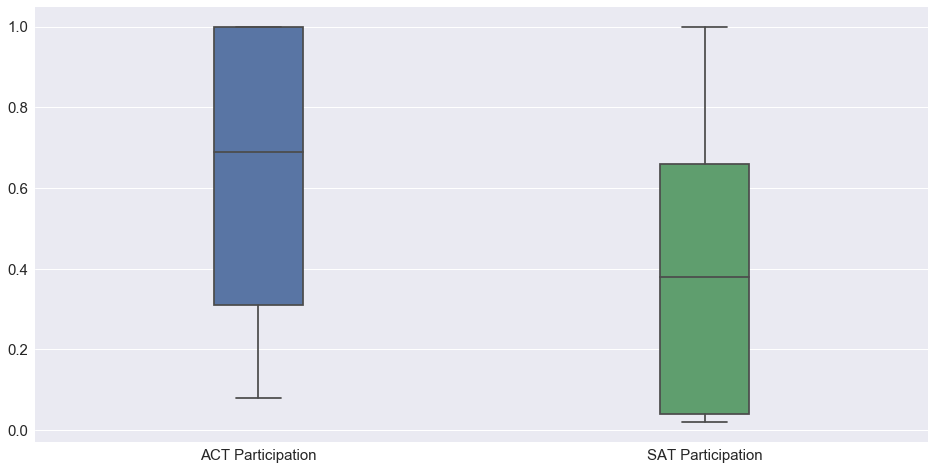

In [68]:
sns.boxplot(data=both.loc[:, ['ACT Participation', 'SAT Participation']], width=0.2)

plt.show()

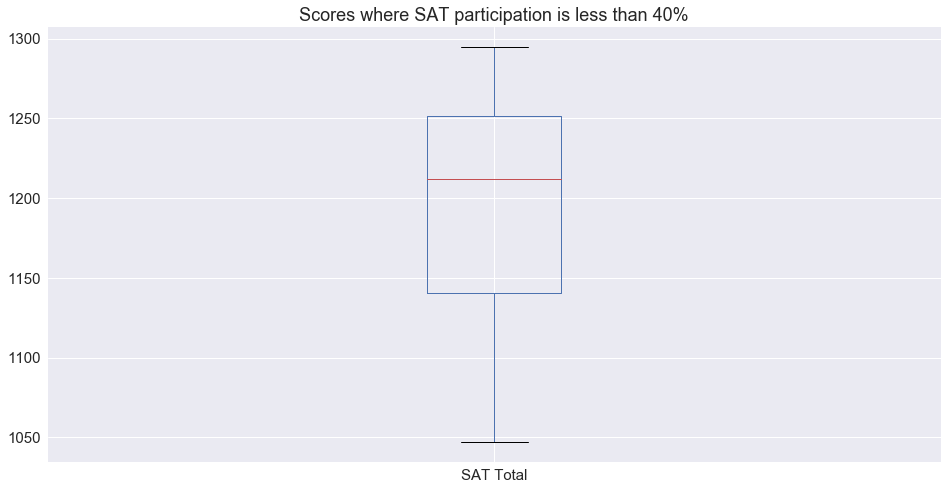

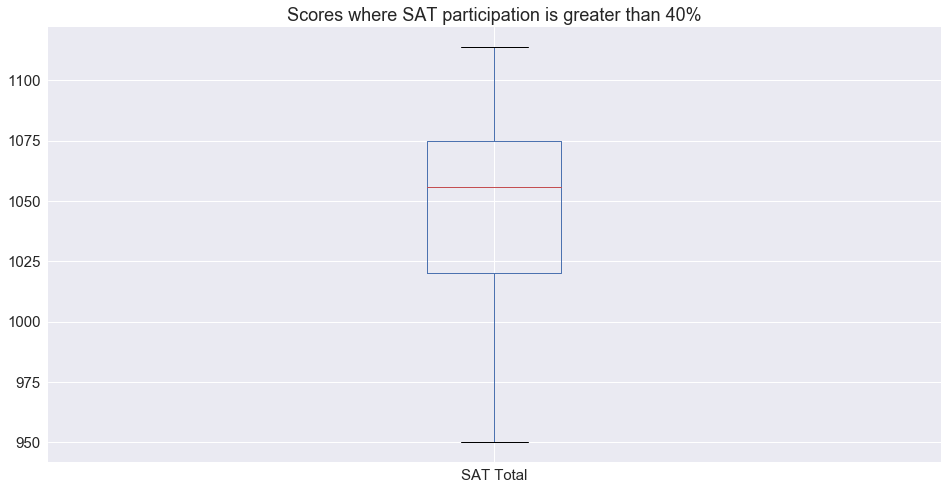

In [69]:
plt.figure(1)
both[both['SAT Participation'] <= .4].boxplot(column=['SAT Total'])
plt.title('Scores where SAT participation is less than 40%')
plt.figure(2)
both[both['SAT Participation'] > .4].boxplot(column=['SAT Total'])
plt.title('Scores where SAT participation is greater than 40%')
plt.show()
#gotta get these on the same graph

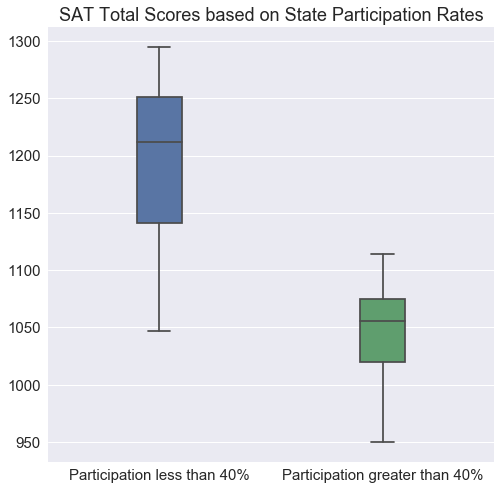

In [105]:
gt4 = both['SAT Total'][both['SAT Participation'] <= .4]
lt4 = both['SAT Total'][both['SAT Participation'] > .4]

newdf4 = pd.DataFrame([gt4, lt4]).transpose()
newdf4.columns = ['Participation less than 40%', 'Participation greater than 40%']

plt.rcParams['figure.figsize'] = [8, 8]
sns.set(font_scale=1.5)

sns.boxplot(data=newdf4, width=0.2)
plt.title('SAT Total Scores based on State Participation Rates')
plt.show()
plt.rcParams['figure.figsize'] = [16, 8]

# mean is over 150 points higher for those states with participation less than 40% and over 75% of those states have higher averages than the highest state with participation above 40%!

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

I put it in my presentation.  I wasn't able to save it for some reason, so I just took a screenshot of it!  Tableau is crazy easy.

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [72]:
# Wanted to get an idea of how to describe distributions
#"""Descriptive statistics often involves using a few numbers to summarize a distribution. 
#One important aspect of a distribution is where its center is located. Measures of central 
#tendency are discussed first. A second aspect of a distribution is how spread out it is. In 
#other words, how much the numbers in the distribution vary from one another. The second section 
#describes measures of variability. Distributions can differ in shape. Some distributions are 
#symmetric whereas others have long tails in just one direction. The third section describes 
#measures of the shape of distributions. The final two sections concern (1) how transformations 
#affect measures summarizing distributions and (2) the variance sum law, an important relationship 
#involving a measure of variability."""
# From http://onlinestatbook.com/2/summarizing_distributions/summarizing_distributions.html

#Or I could wait to talk in class about it...
#Center (mean, median, mode), Spread (std, var, range), Shape (skew vs symmetric)

In [73]:
both.describe(include='all')

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total
count,51,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
unique,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.398039,569.117647,556.882353,1126.098039
std,NaN,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.352766,45.666901,47.121395,92.494812
min,NaN,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000
25%,NaN,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000
50%,NaN,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000
75%,NaN,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000


In [74]:
#both.median()
# I'm silly.  50th percentile is, of course, the median.

## My description:

SAT Participation: states are spread out from 2% to 100%, with half the states have 38% or less participation in fact, over 75% of the states have participation rates of less than 66% giving the distribution a right skew toward the 4 states with 100% participation.

ACT Participation: states are spread out from 8% to 100% with 17 states at 100%.  Half of all states have 69% or more participation and 75% have more than 31% participation giving the distribution a left skew.

ACT English, Math, Reading, Science, and Composite average state scores all have centers between 20 and 22.01 and skew to the right with some state averages scoring fairly high (from other comparisons these were lower participation states).  The overall range was as low as 16.3 (English, which had the lowest center as well) and as high as 26 (Reading, which also had the highest mean/median/center)

SAT English/Reading, Math, and Total scores followed similar trends to the ACT scores. 50% of states had average English scores below 559 and Math scores below 548.  The scores skew higher (right) with some states scoring as high as 644 in English or 651 in Math.  The minimum scores were 482 in English and 468 in Math.  Total state averages were between 950 and 1295 with a center of 1107 (mean of 1126, again showing the skew toward higher scores).

In [106]:
#I was using this to reploting columns to easily see for description above
#sns.distplot(both['SAT Total'], bins=10, kde=True)
#plt.title('Distribution of SAT Total Scores')
#plt.xlabel('Stuff')
#plt.ylabel('')
#plt.xlim(950, 1300)
#plt.show()

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

The most striking relationship I found was between participation rates and the average scores.  Where state participation rates were highest, average scores were lowest and vice versa.  This was true of both the ACT and SAT, but the drop was more pronounced in SAT scores.  When comparing states that had participation rates for the SAT above 40% verses those with less that 40%, the difference in SAT scores was very clear. The averages of the scores were different by over 150 points and in face.  Over 75% of states with participation rates less than 40% had higher average SAT Total scores than ANY states with a participation rate greater than 40%.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [76]:
import scipy.stats as stats

# we have not done a python example yet, so... i'm just testing this
stats.ttest_1samp(both['SAT Participation'],both['ACT Participation'].mean())
#welp, super low p-value. assuming i put in the right stuff, it's safe to say the actual populations (which aren't these actual anyway?  like complete population data?) do not have the same mean

Ttest_1sampResult(statistic=-5.1523159443237976, pvalue=4.3835608225711037e-06)

In [77]:
#Ho = SAT Participation mean = ACT Participation mean
#Ha = SAT Participation mean != ACT Participation mean
#Alpha = .05

sat_mean = both['SAT Participation'].mean()
act_mean = both['ACT Participation'].mean()
sigma = np.std(both['SAT Participation'])
n = 51

test_stat = (sat_mean - act_mean) / (sigma / (n-1)**(0.5))
test_stat
# Could I do just n here instead of n-1 since this is presumably the full population?
# Same test statistic as above; good sign

-5.1523159443237985

In [108]:
# OK, learning more.  The docstring for ttest_1samp is about testing a sample of a population against the population.  We have two different samples of one population! Some students could have taken both, some neither, etc.

stats.ttest_rel(both['SAT Participation'], both['ACT Participation'])
#well, different test statistic, but perhaps I'm not sure how to calculate the correct one.
# p-score is smaller than .05.
# We reject the hypothosis that the two means are equal and know that they must be different.

Ttest_relResult(statistic=-2.8095519783707887, pvalue=0.0070619284220823789)

In [111]:
# Thanks, Matt, for your final hour link!  Haha.
test_stat2 = (sat_mean - act_mean) / (((sat_mean*(1-sat_mean))/n)+((act_mean*(1-act_mean))/n))**(0.5)
test_stat2
# Can I call that close enough or...?

-2.66159287436832

In [116]:
stats.ttest_ind(both['SAT Participation'], both['ACT Participation'], equal_var=True)
# I'm out of tests, BUT all the p-scores are below .05

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [79]:
conf_level = 0.95
n = len(both['SAT Participation'])
mean = np.mean(both['SAT Participation'])
sigma = np.std(both['SAT Participation'], ddof = 1)
degrees_of_freedom = n-1
stats.t.interval(conf_level, degrees_of_freedom, loc=mean, scale=sigma/((n-1) ** 0.5))
# same n commment as above, but it should only really increase my interval

(0.29783482931748478, 0.49824360205506429)

In [80]:
conf_level = 0.95
n = len(both['ACT Participation'])
mean = np.mean(both['ACT Participation'])
sigma = np.std(both['ACT Participation'], ddof = 1)
degrees_of_freedom = n-1
stats.t.interval(conf_level, degrees_of_freedom, loc=mean, scale=sigma/((n-1) ** 0.5))

(0.56125194433924164, 0.74384609487644449)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

no... should it have been?  They do not even overlap.

In [81]:
satstd = np.std(both['SAT Participation'])

In [82]:
1.96 * (satstd/(n)**(0.5))

0.09586454501035059

In [83]:
actstd = np.std(both['ACT Participation'])

In [84]:
1.96 * (actstd/(n)**(0.5))

0.08734300861031176

Given that I rejected the two means being the same, I am not surprised that their 95% intervals to not overlap

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

I attempted to look at the SAT and ACT math scores by state and see if they coorilated, but they do not.  A cursarary review may have assumed that higher scores on the math SAT would equate to higher scores on the math ACT, however the test takers are not the same population.  States with low participations in either test are likelier to have college bound, high performers looking for a particular edge.  It may be more interesting to look at scores in states with similar participation rates and see if they coorelate, but even there you cannot assume you are studying the same population.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

We have access to all the population data.  If all I care about is 2017, then it does not make sense to conduct statistical inference.  The only odd thing about this data is that we are presented with averages of the data instead of the data directly.  Presumably we have the scores of every student who took either exam in 2017.  The participation rates could have been approximated depending on how the data was collected (I am not sure how they identified what 100% looks like), but that information could also be know as reported from schools.

## I haven't finished my presentation, but I HAVE TO KNOW

Source: Western Interstate Commission for Higher Education, Knocking at the College Door: Projections of High School Graduates, 2016, www.wiche.edu/knocking.

In [85]:
newshit = pd.read_csv('../data/rawdata-wiche/Projections-Table 1.csv')
newshit.shape
newshit.head()
newshit = newshit[['SURVYEAR', 'TYPE', 'G12', 'STNAME']]
newshit.head()

,SURVYEAR,TYPE,G12,STNAME
0,2000,G,"42,512",Alabama
1,2001,G,"42,909",Alabama
2,2002,G,"42,521",Alabama
3,2003,G,"42,005",Alabama
4,2004,G,"42,672",Alabama


In [86]:
newshit.dtypes

SURVYEAR     int64
TYPE        object
G12         object
STNAME      object
dtype: object

In [87]:
newshit = newshit[newshit['SURVYEAR'] == 2018]
newshit.head()

,SURVYEAR,TYPE,G12,STNAME
18,2018,G,"49,063",Alabama
50,2018,HI,"2,536",Alabama
82,2018,WH,"28,852",Alabama
114,2018,BL,"16,512",Alabama
146,2018,AS,790,Alabama


In [88]:
#newshit['TYPE'] == 'G' | newshit['TYPE'] == 'NP'
#grrrr, this is why i shouldn't do this.  running into issues and taking time
newshit = newshit[(newshit['TYPE'] == 'G') | (newshit['TYPE'] == 'NP')]
newshit.head()

,SURVYEAR,TYPE,G12,STNAME
18,2018,G,"49,063",Alabama
210,2018,NP,"4,175",Alabama
242,2018,G,"9,235",Alaska
434,2018,NP,201,Alaska
466,2018,G,"86,204",Arizona


In [89]:
#now the coup d'etat
#testshit = newshit.apply(lambda x: newshit[newshit['TYPE'] =='G']['G12'] + newshit[newshit['TYPE'] =='NP']['G12'], axis=1)
#testshit.head()
#well that was a mess!

In [90]:
newshit.dtypes

SURVYEAR     int64
TYPE        object
G12         object
STNAME      object
dtype: object

In [91]:
#but i ain't done
#newshit.groupby('STNAME', axis=1).sum()
newshit['G12'] = newshit['G12'].apply(lambda x: x.replace(',',''))
newshit['G12'] = newshit['G12'].astype(int)
#oh hell to the yes!

In [92]:
newshit = newshit.groupby('STNAME').sum()
# it's so beautiful.  even with the fuzzy year.

In [93]:
newshit.head()

,SURVYEAR,G12
STNAME,,
Alabama,4036,53238
Alaska,4036,9436
Arizona,4036,88391
Arkansas,4036,33444
California,4036,507901


In [94]:
newshit = newshit.reset_index()
newshit.head()

,STNAME,SURVYEAR,G12
0,Alabama,4036,53238
1,Alaska,4036,9436
2,Arizona,4036,88391
3,Arkansas,4036,33444
4,California,4036,507901


In [95]:
supera = pd.merge(both, newshit, left_on='State', right_on='STNAME', how='inner')
supera.head()
#i'm so happy, I don't even know what to do with it all...

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,STNAME,SURVYEAR,G12
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,Alabama,4036,53238
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,Alaska,4036,9436
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,Arizona,4036,88391
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,Arkansas,4036,33444
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,California,4036,507901


In [96]:
supera[supera['ACT Participation'] < .5].sort_values('SAT Participation', ascending=True)
#HAHAHAHAHAHAHA
#When I'm being paid for this, I'll run a formula combining the population with current participation rates, but I'm so sleepy
#Let's just put all our money on Cali and Texas and call it a day.  Good plan?  Good plan.

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,STNAME,SURVYEAR,G12
37,Oregon,0.40,21.2,21.5,22.4,21.7,21.8,0.43,560,548,1108,Oregon,4036,48753
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,California,4036,507901
45,Vermont,0.29,23.3,23.1,24.4,23.2,23.6,0.60,562,551,1114,Vermont,4036,6874
43,Texas,0.45,19.5,20.7,21.1,20.9,20.7,0.62,513,507,1020,Texas,4036,356653
14,Indiana,0.35,22.0,22.4,23.2,22.3,22.6,0.63,542,532,1074,Indiana,4036,83909
47,Washington,0.29,20.9,21.9,22.1,22.0,21.9,0.64,541,534,1075,Washington,4036,89083
46,Virginia,0.29,23.5,23.3,24.6,23.5,23.8,0.65,561,541,1102,Virginia,4036,96585
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,1071,Pennsylvania,4036,145412
32,New York,0.31,23.8,24.0,24.6,23.9,24.2,0.67,528,523,1052,New York,4036,214910
20,Maryland,0.28,23.3,23.1,24.2,23.2,23.6,0.69,536,524,1060,Maryland,4036,64295


In [97]:
supera.sort_values('ACT Participation', ascending=False)
#[supera['SAT Participation'] < .5] # was looking to see if the 17 100% ACT states were also lowest SAT ones and only found 16
#Huh NC is an annomoly with 100% ACT and 49% SAT.  I bet ACT is newly required there...

,State,ACT Participation,ACT English,ACT Math,ACT Reading,ACT Science,ACT Composite,SAT Participation,SAT Evidence-Based Reading and Writing,SAT Math,SAT Total,STNAME,SURVYEAR,G12
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,Alabama,4036,53238
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247,Kentucky,4036,47438
49,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291,Wisconsin,4036,71294
44,Utah,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238,Utah,4036,48543
42,Tennessee,1.00,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228,Tennessee,4036,72458
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,South Carolina,4036,50272
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047,Oklahoma,4036,44092
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,North Carolina,4036,108397
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116,Nevada,4036,33454
26,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,591,1196,Montana,4036,10181
